In [10]:
import pandas as pd
import glob,re,pickle

In [4]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [5]:
baseRepName="/Users/gilles/Box Sync/2015-Data/"
repName=baseRepName+"DerivationParadigmes/"
longNames=[n for n in glob.glob(repName+"*.pkl") if not "Morphome" in n]

In [6]:
def arrondi(n):
   return int(round(n,0)) 

In [22]:
data={}
for nTirage,tirage in enumerate(longNames):
    with open(tirage,"rb") as input:
        pdTirage=pickle.load(input)
        nbTokens=pdTirage["tir1"].sum()
        s=pdTirage.groupby(by="lexeme")["tir1"].count()
        nbHapax=s.where(s==1).count()
        data[nTirage]=[nbTokens,nbHapax]

In [72]:
pdHapax=pd.DataFrame.from_dict(data,orient="index",dtype=int).sort_index()
pdHapax.columns=["tokens","number of lexemes with 1 isolated form"]
pdHapax.set_index("tokens",inplace=True)
pdHapax

,number of lexemes with 1 isolated form
tokens,
1000,261
2000,367
3000,436
4000,488
5000,514
6000,548
7000,572
8000,607
9000,641


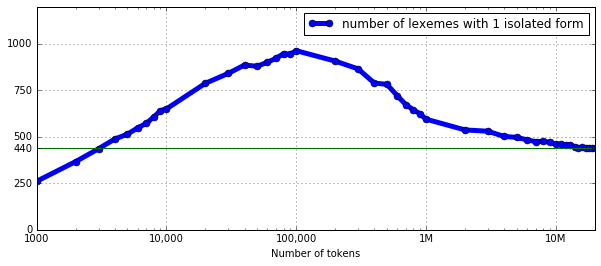

In [75]:
ax=pdHapax.plot(linewidth=5,marker="o",markersize=7,figsize=(10,4),logx=True)
ax.set(xlabel="Number of tokens")
ax.set_xticks([1000,10000,100000,1000000,10000000,100000000])
ax.set_xticklabels(["1000","10,000","100,000","1M","10M"])
ax.set_xlim(1000,20000000)
ax.set_ylim(0,1200)
ax.xaxis.grid(True, which='major')
ax.yaxis.grid(True, which='major')
ax.axhline(y=440, color='g', linestyle='-')
ax.set_yticks(np.array([0,250,440,500,750,1000]))
plt.savefig(repName+"Hapax.png", format='png', dpi=300)